<center>
<hr>
<h1>Complessità nei sistemi sociali</h1>
<h2>Laurea Magistrale in Fisica Dei Sistemi Complessi</h2>
<h2>A.A. 2019/20</h2>
<h3>Daniela Paolotti & Michele Tizzoni</h3>
<h3>Notebook 5 - Basic network analysis with NetworkX, assortativity, resilience to attacks</h3>
<hr>
</center>

In [1]:
import networkx as nx
import seaborn as sns

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Connectivity and clustering of a graph

We study the network of coauthorships of Astro-Ph, from the SNAP database.

In [3]:
filepath='./../network_data/ca-AstroPh.txt'

In [4]:
G=nx.Graph()

In [5]:
fh=open(filepath,'r')
for line in fh.readlines():
    s=line.strip().split()
    if s[0]!='#':
        origin=int(s[0])
        dest=int(s[1])
        G.add_edge(origin,dest)
fh.close()

In [6]:
print("The graph has", len(G), "nodes and",len(G.edges()),"edges")

The graph has 18772 nodes and 198110 edges


In [7]:
print("Is the graph simply connected?", nx.is_connected(G))

Is the graph simply connected? False


### Show the components of the graph

In [8]:
print("The graph has", nx.number_connected_components(G),"connected components")

The graph has 290 connected components


In [9]:
for k in nx.connected_components(G):
    print(len(k))

17903
2
3
4
8
2
2
4
3
5
3
3
2
2
5
5
2
7
2
3
10
3
4
4
4
2
2
3
6
4
2
4
2
3
2
2
5
4
6
2
2
5
3
2
2
2
2
4
3
2
4
2
3
3
2
3
3
2
3
3
5
3
2
3
5
3
2
3
2
2
3
2
3
4
3
3
3
3
2
5
2
4
2
4
10
2
3
3
3
4
3
2
3
2
2
3
5
2
3
2
3
2
3
2
3
9
2
3
4
3
4
3
3
5
5
2
3
2
2
2
2
2
2
2
3
4
2
2
2
2
2
3
3
2
3
2
2
4
2
2
4
4
3
3
2
2
3
3
3
2
3
2
2
2
2
4
3
2
12
2
3
8
3
2
2
7
4
3
3
2
2
2
2
3
2
3
2
2
3
2
2
3
2
4
2
2
2
2
2
2
2
3
3
2
2
2
4
2
3
2
3
2
4
2
4
2
4
4
2
5
2
2
2
3
2
4
2
2
3
3
3
3
8
2
3
2
2
3
2
2
2
2
4
1
3
2
2
2
2
3
2
2
3
2
2
2
2
3
2
2
5
2
4
2
6
18
3
2
3
3
2
2
3
4
2
2
4
3
3
4
7
5
2
3
3
2
2
4
2
4
2
2
2
2
2
2
2
3
2
2


### Extract the largest Connected Component as a subgraph

In [10]:
nx.connected_component_subgraphs(G)

<generator object connected_component_subgraphs at 0x1a15168bf8>

In [11]:
graphs = list(nx.connected_component_subgraphs(G))

In [12]:
graphs

In [13]:
H=graphs[0]

In [14]:
len(H)

17903

In [15]:
print(len(G)-len(H))

869


In [16]:
print("Check that the graph is now connected")
nx.number_connected_components(H)

Check that the graph is now connected


1

## Global clustering coefficient

The global clustering coefficient measures the number of triangles in the network and it's defined as: 
<center>
$C_\Delta = \frac{3 \times \text{triangles}}{\text{triplets}}$
</center> 

In [17]:
nx.triangles(H)

{3: 625,
 4: 1,
 65540: 12,
 65541: 10,
 32776: 60,
 32777: 21,
 65546: 119,
 98315: 365,
 32778: 1,
 13: 16,
 98318: 693,
 98319: 3,
 15: 0,
 17: 0,
 16: 1,
 131091: 2837,
 32787: 130,
 98325: 92,
 98326: 6,
 32791: 580,
 26: 12,
 27: 0,
 65564: 334,
 32796: 7,
 65566: 45,
 30: 2357,
 65568: 10,
 65567: 45,
 65569: 45,
 65571: 21,
 98340: 9,
 32799: 3,
 35: 3,
 65570: 3,
 98345: 317,
 98346: 153,
 43: 231,
 41: 11,
 98349: 55,
 98348: 3,
 131121: 2836,
 98354: 13,
 131122: 3,
 98356: 3,
 131123: 3,
 98358: 5,
 131126: 11,
 131127: 6,
 57: 114,
 65595: 489,
 131133: 1779,
 65597: 1,
 65599: 28,
 32840: 469,
 73: 3,
 65610: 54,
 65613: 335,
 80: 2,
 65620: 21,
 84: 4,
 86: 157,
 88: 352,
 65627: 28,
 65628: 0,
 65629: 406,
 95: 5,
 131167: 616,
 65637: 32,
 65638: 55,
 102: 11,
 65642: 1933,
 65643: 45,
 98412: 379,
 106: 19,
 131180: 97,
 98417: 325,
 114: 1545,
 117: 915,
 119: 94,
 120: 6,
 65657: 19,
 124: 3,
 98431: 21,
 98432: 28,
 131204: 1877,
 98439: 348,
 131209: 980,
 98441: 

How many triangles are there in the whole network?

In [18]:
tt=sum(list(nx.triangles(H).values()))

In [19]:
tt/3

1350014.0

The transitivity is the fraction of all possible triangles in the network.

In [20]:
nx.transitivity(H)

0.31777791273391154

## Average clustering coefficient
As an alternative to the global clustering coefficient, the overall level of clustering in a network is measured by Watts and Strogatz as the average of the local clustering coefficients of all the vertices $n$:

<center>
$\bar{C} = \frac{1}{n}\sum_{i=1}^{n} C_i.$
</center>

It is worth noting that this metric places more weight on the low degree nodes, while the transitivity ratio places more weight on the high degree nodes. In fact, a weighted average where each local clustering score is weighted by $k_i(k_i-1)$ is identical to the global clustering coefficient.

In [21]:
print("The average clustering coefficient of H is")
nx.average_clustering(H)

The average clustering coefficient of H is


0.6328232091518615

## Average sorthest path length
#### Warning! Calculating the shortest paths is intensive! 

The graph is small world.

In [22]:
nx.average_shortest_path_length(H)

4.194011768617203

In [23]:
math.log(len(H))

9.792723575551273

### Compare the results with a random ER network

We generate a random Erdos-Renyi graph with same average connectivity of H, i.e. same number of nodes and edges.

In [22]:
nnodes=18000
plink=0.00122

ER=nx.fast_gnp_random_graph(nnodes, plink)

In [23]:
nx.is_connected(ER)

True

In [24]:
print("The ER graph has", len(ER), "nodes")
print("and",len(ER.edges()),"edges")

The ER graph has 18000 nodes
and 197137 edges


In [25]:
print("The average clustering coefficient of ER is")
nx.average_clustering(ER)

The average clustering coefficient of ER is


0.0012189808934050456

In [26]:
print(sum(list(nx.triangles(ER).values()))/3)

1755.0


The ER graph is also small world!

In [29]:
nx.average_shortest_path_length(ER)

3.5227083973801014

### Compare the results with a random AB network

In [27]:
AB=nx.barabasi_albert_graph(18000,11)

In [28]:
print("The AB graph has", len(AB), "nodes")
print("and",len(AB.edges()),"edges")

The AB graph has 18000 nodes
and 197879 edges


In [29]:
from collections import Counter 
degrees=dict(AB.degree()).values()
c=Counter(degrees)

In [30]:
import powerlaw as pwl

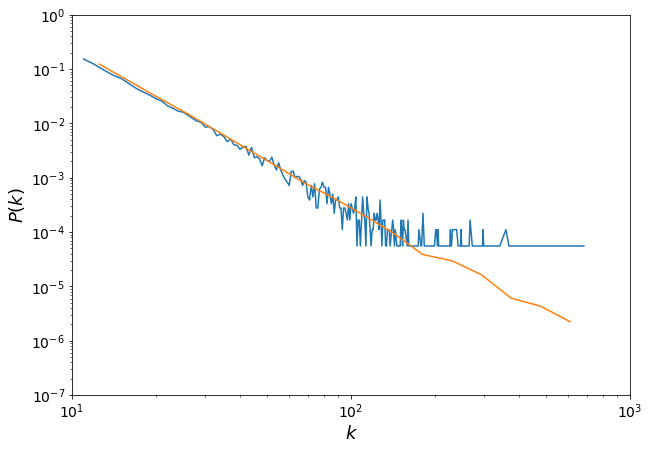

In [31]:
plt.figure(figsize=(10,7))
x=[]
y=[]
for i in sorted(c):   
    x.append(i)
    y.append(float(c[i])/len(AB))

    
plt.plot(np.array(x),np.array(y))
pwl.plot_pdf(list(degrees))

plt.xlabel('$k$', fontsize=18)
plt.ylabel('$P(k)$', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.axis([10,1000,0.0000001,1])
plt.show()

In [32]:
fit_function = pwl.Fit(list(degrees), xmin=11)

/anaconda/envs/py36/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [33]:
fit_function.power_law.alpha

/anaconda/envs/py36/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


3.0530240816774117

In [34]:
fit_function.power_law.sigma

0.015302338020249244

In [35]:
fit_function.power_law.xmin

11.0

In [36]:
print("The average clustering coefficient of AB is")
nx.average_clustering(AB)

The average clustering coefficient of AB is


0.00745863180887948

In [37]:
print("The number of triangles is ", sum(list(nx.triangles(AB).values()))/3)

The number of triangles is  22835.0


The AB network is also small-world.

In [36]:
nx.average_shortest_path_length(AB)

3.1344822304942865

### Compare the results with a random WS network

In [38]:
WS=nx.connected_watts_strogatz_graph(18000,23,0.2,50)

In [39]:
print("The WS graph has", len(WS), "nodes")
print("and",len(WS.edges()),"edges")

The WS graph has 18000 nodes
and 198000 edges


In [40]:
nx.is_connected(WS)

True

In [41]:
ws_degrees=(dict(WS.degree()).values())

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 <a list of 9 Text yticklabel objects>)

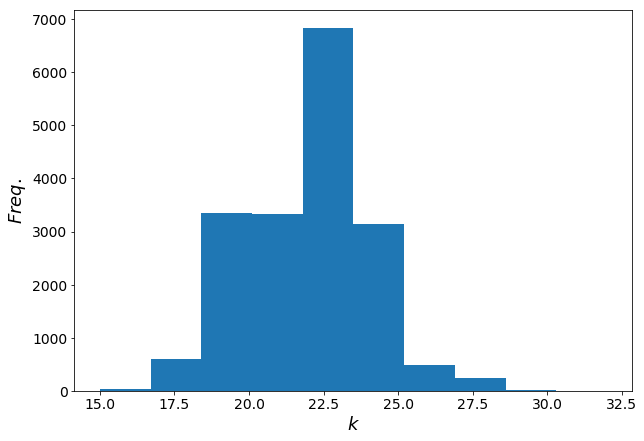

In [42]:
plt.figure(figsize=(10,7))
plt.hist(ws_degrees, bins=10)
plt.xlabel('$k$', fontsize=18)
plt.ylabel('$Freq.$', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [43]:
print("The average clustering coefficient of WS is")
nx.average_clustering(WS)

The average clustering coefficient of WS is


0.3700084990825839

The Watt-Strogatz network is still small-world but with high clustering.

In [43]:
nx.average_shortest_path_length(WS)

4.032931736948349

## Closeness Centrality

In connected graphs there is a natural distance metric between all pairs of nodes, defined by the length of their shortest paths. 
The '''farness''' of a node ''x'' is defined as the sum of its distances from all other nodes, and its closeness was defined by Bavelas as the reciprocal of the farness that is:


<center>
$C(x)= \frac{1}{\sum_y d(y,x)}.$
</center>


Thus, the more central a node is the lower its total distance from all other nodes. Note that taking distances ''from'' or ''to'' all other nodes is irrelevant in undirected graphs, whereas in directed graphs distances ''to'' a node are considered a more meaningful measure of centrality, as in general (e.g., in, the web) a node has little control over its incoming links.


#### Be careful! Computing all the distances between pair of nodes can be intensive.

In [45]:
close_centr=nx.closeness_centrality(H, 84424)

In [46]:
print(close_centr)

0.30557831489826576


# Degree assortativity of a network

Assortativity can be measured in different ways. A simple approach is measuring the average nearest neighbor degree to assess the level of degree-assortativity.

In [47]:
from collections import defaultdict

In [48]:
x=[]
y=[]

avg_knn=defaultdict(list)

for n in G.nodes():
    k=G.degree(n)
    
    #nn=len(G.neighbors(n))
    total=0
    for j in G.neighbors(n):
        total+=G.degree(j)
    
    avg_knn[k].append(float(total)/k)
    
    x.append(k)
    y.append(float(total)/k)

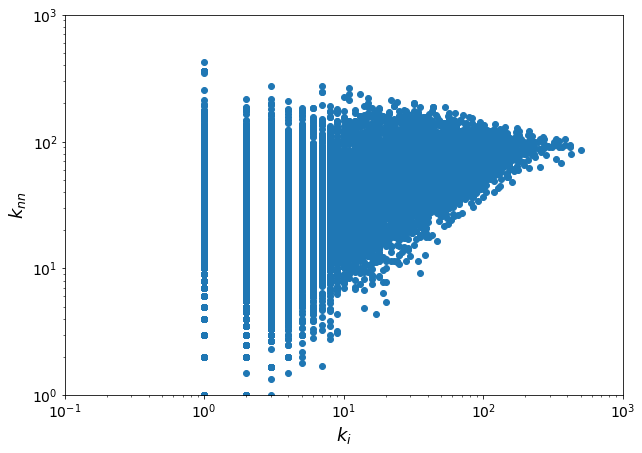

In [49]:
plt.figure(figsize=(10,7))
plt.scatter(x,y)

plt.xlabel('$k_i$', fontsize=18)
plt.ylabel('$k_{nn}$', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.axis([0.1,1000,1,1000])
plt.show()

In [50]:
z=[]
for k in sorted(avg_knn.keys()):
    knn=np.array(avg_knn[k])
    z.append(np.average(knn))

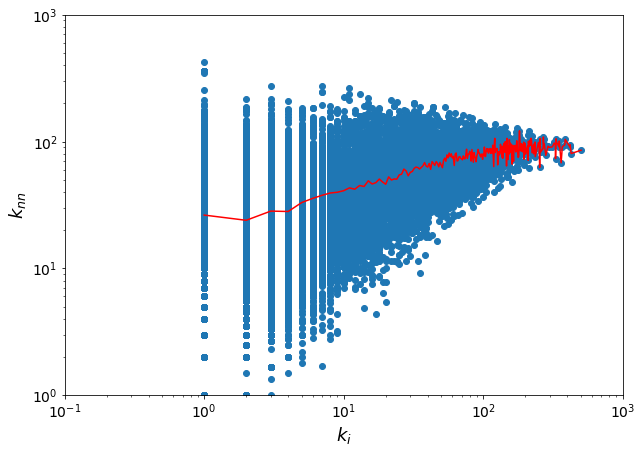

In [51]:
plt.figure(figsize=(10,7))
plt.scatter(x,y)
plt.plot(sorted(avg_knn.keys()), z,'-r')

plt.xlabel('$k_i$', fontsize=18)
plt.ylabel('$k_{nn}$', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.axis([0.1,1000,1,1000])
plt.show()

In [52]:
r=nx.degree_assortativity_coefficient(G)

In [53]:
print(r)

0.20512067898648875


The degree assortativity coefficient of a ER graph is zero. The ER graph has no correlations.

In [54]:
ERr=nx.degree_assortativity_coefficient(ER)

In [55]:
ERr

-0.003457912181657471

NetworkX offers a number of functions to compute the same quantity.

In [56]:
knn_avg2=nx.average_degree_connectivity(G)

In [57]:
print(knn_avg2)

{75: 77.99882352941177, 31: 58.04037897586284, 43: 69.43556771545828, 2: 23.927865037812683, 90: 77.11203703703704, 42: 60.331389698736636, 118: 78.43502824858757, 30: 57.107625272331155, 113: 80.56814159292036, 3: 28.27523510971787, 28: 58.709793351302785, 8: 39.26327433628319, 158: 86.37341772151899, 13: 44.994888023369036, 77: 73.6357733175915, 36: 62.516007532956685, 257: 86.91439688715953, 12: 42.094705443698736, 134: 89.48258706467662, 55: 78.45880077369439, 171: 82.84210526315789, 86: 81.7296511627907, 15: 48.993356242840775, 274: 96.15328467153284, 47: 67.27006769825918, 91: 80.11648351648351, 22: 49.707849419303166, 150: 90.85555555555555, 14: 44.20594010800196, 6: 35.63912864775997, 52: 71.10063224446786, 67: 75.60914179104478, 108: 87.86516203703704, 27: 60.657407407407405, 142: 87.4906103286385, 62: 64.69180470793374, 7: 37.66788247213779, 61: 76.44262295081967, 49: 68.4408811143505, 132: 81.35950413223141, 41: 67.15829746532759, 5: 33.02613981762918, 32: 61.44760338345865,

In [58]:
knn_avg3=nx.k_nearest_neighbors(G)

In [59]:
print(knn_avg3)

{75: 77.99882352941177, 31: 58.04037897586284, 43: 69.43556771545828, 2: 23.927865037812683, 90: 77.11203703703704, 42: 60.331389698736636, 118: 78.43502824858757, 30: 57.107625272331155, 113: 80.56814159292036, 3: 28.27523510971787, 28: 58.709793351302785, 8: 39.26327433628319, 158: 86.37341772151899, 13: 44.994888023369036, 77: 73.6357733175915, 36: 62.516007532956685, 257: 86.91439688715953, 12: 42.094705443698736, 134: 89.48258706467662, 55: 78.45880077369439, 171: 82.84210526315789, 86: 81.7296511627907, 15: 48.993356242840775, 274: 96.15328467153284, 47: 67.27006769825918, 91: 80.11648351648351, 22: 49.707849419303166, 150: 90.85555555555555, 14: 44.20594010800196, 6: 35.63912864775997, 52: 71.10063224446786, 67: 75.60914179104478, 108: 87.86516203703704, 27: 60.657407407407405, 142: 87.4906103286385, 62: 64.69180470793374, 7: 37.66788247213779, 61: 76.44262295081967, 49: 68.4408811143505, 132: 81.35950413223141, 41: 67.15829746532759, 5: 33.02613981762918, 32: 61.44760338345865,

In [60]:
r2=nx.degree_pearson_correlation_coefficient(G)
print(r2)

0.20512067898648864


---
# Simulating random and targeted attacks to a network

Resilience is the ability to provide and maintain an acceptable level of service in the face of faults and challenges to normal operation. Threats and challenges for services can range from simple misconfiguration over large scale natural disasters to targeted attacks.

We define a function that performs a random or targeted attack to a network according to a given strategy (random, degree based, betweenness based, etc. )

In [61]:
def net_attack(graph, ranked_nodes):
    
    fraction_removed=[]#here we store the tuples: (%removed nodes, size of gcc)
    
    graph1=graph.copy()
    nnodes=len(ranked_nodes)
    n=0    
    
    gcc=list(nx.connected_components(graph1))[0]
    
    gcc_size=float(len(gcc))/nnodes
    
    fraction_removed.append( (float(n)/nnodes, gcc_size) )
    
    while gcc_size>0.01:
        
        #we start from the end of the list!
        graph1.remove_node(ranked_nodes.pop())

        gcc=list(nx.connected_components(graph1))[0]
        gcc_size=float(len(gcc))/nnodes
        n+=1
        fraction_removed.append( (float(n)/nnodes, gcc_size) )
    
    return fraction_removed

# Robustness of the US airport network
## Random attack

In [62]:
filepath_air='./../network_data/USairport_2010.txt'

In [63]:
G=nx.Graph()
fh=open(filepath_air,'r')
for line in fh.readlines():
    s=line.strip().split()
    G.add_edge(int(s[0]),int(s[1]))
fh.close()    

In [64]:
airport_nodes=list(G.nodes())

In [65]:
resilience_random=net_attack(G, airport_nodes)

## Betweenness based attack

In [66]:
from operator import itemgetter

In [67]:
airport_nodes_betw=[]

betw=nx.betweenness_centrality(G)
for i in sorted(betw.items(), key=itemgetter(1)):
    airport_nodes_betw.append(i[0])


resilience_betw=net_attack(G, airport_nodes_betw)

## Degree based attack

In [68]:
airport_nodes_degree=[]

deg=dict(G.degree())
for i in sorted(deg.items(), key=itemgetter(1)):
    airport_nodes_degree.append(i[0])


resilience_deg=net_attack(G, list(airport_nodes_degree))

Let's compare the results.

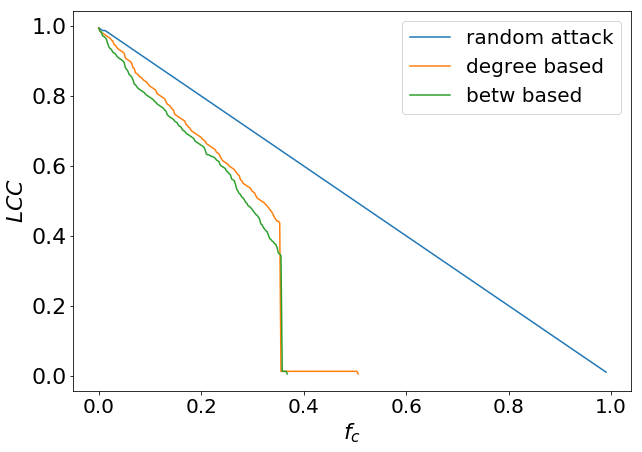

In [70]:
x=[k[0] for k in resilience_random]
y=[k[1] for k in resilience_random]

x1=[k[0] for k in resilience_deg]
y1=[k[1] for k in resilience_deg]

x2=[k[0] for k in resilience_betw]
y2=[k[1] for k in resilience_betw]

plt.figure(figsize=(10,7))

plt.plot(x,y, label='random attack')
plt.plot(x1,y1, label='degree based')
plt.plot(x2,y2, label='betw based')

plt.xlabel('$f_{c}$', fontsize=22)
plt.ylabel('$LCC$', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=22)

plt.legend(loc='upper right', fontsize=20)

Real networks such as the air transport network are vulnerable to targeted attacks.

# Robustness of the Erdos-Renyi random network

In [84]:
ER=nx.fast_gnp_random_graph(2000,0.012)
ER_nodes=list(ER.nodes())

In [85]:
#we rank the nodes by degree
ER_nodes_deg=[i for i,d in sorted(dict(ER.degree()).items(), key=itemgetter(1))]

In [86]:
ER_betw=nx.betweenness_centrality(ER)

In [87]:
ER_nodes_betw=[i for i,b in sorted(dict(ER_betw).items(), key=itemgetter(1))]

In [88]:
resilience_random=net_attack(ER, ER_nodes)
resilience_deg=net_attack(ER, ER_nodes_deg)
resilience_betw=net_attack(ER, ER_nodes_betw)

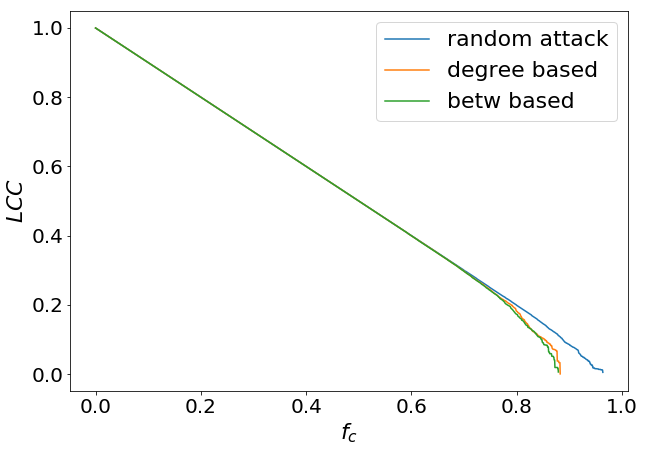

In [90]:
x=[k[0] for k in resilience_random]
y=[k[1] for k in resilience_random]

x1=[k[0] for k in resilience_deg]
y1=[k[1] for k in resilience_deg]

x2=[k[0] for k in resilience_betw]
y2=[k[1] for k in resilience_betw]

plt.figure(figsize=(10,7))

plt.plot(x,y, label='random attack')
plt.plot(x1,y1, label='degree based')
plt.plot(x2,y2, label='betw based')

plt.xlabel('$f_{c}$', fontsize=22)
plt.ylabel('$LCC$', fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc='upper right', fontsize=22)

Random networks such as the E-R network are not vulnerable to targeted attacks.